# ***`Decision Trees Classification Model on the Iris Dataset`***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# ***`Processesing the Data`***

In [2]:
iris = datasets.load_iris()

In [3]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [4]:
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [5]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# ***`Visualizing the Data`***

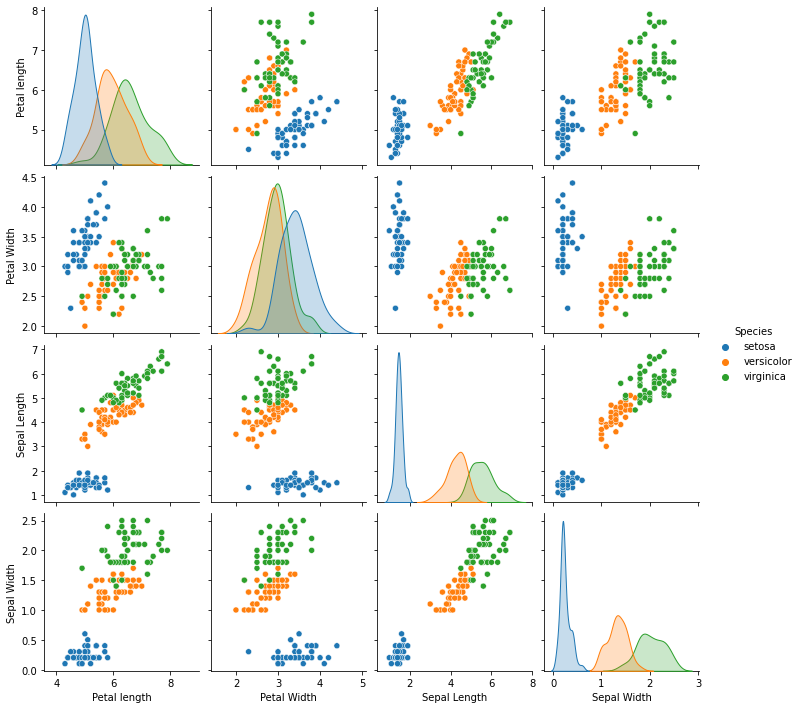

In [6]:
sns.pairplot(data, hue = 'Species')
plt.show()

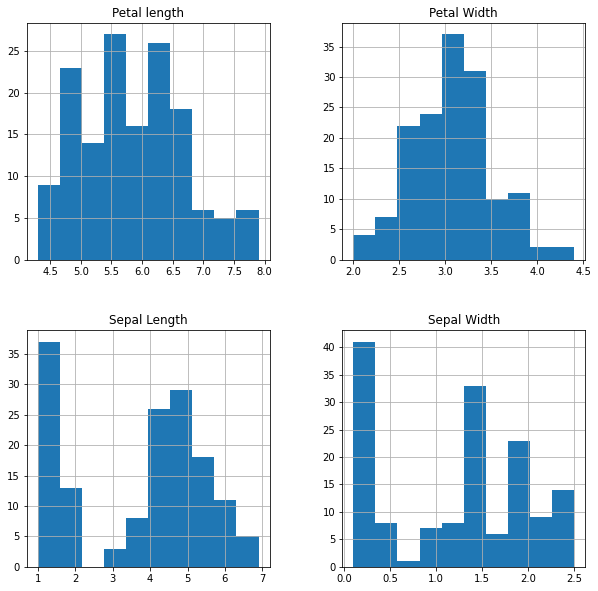

In [7]:
data.hist(figsize=[10,10])
plt.show()

# ***`Decision Trees Model`***

In [8]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.3)

In [9]:
X_train=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
y_train=train.Species

In [10]:
X_test=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
y_test=test.Species

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(random_state=12)
model = tree.fit(X_train, y_train)
tree.predict(X_test)

array(['versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor'], dtype=object)

In [13]:
tree.score(X_test, y_test)
print("Accuracy:",tree.score(X_test, y_test))

Accuracy: 0.9777777777777777


# ***`Visualizing the Decision Tree`***

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


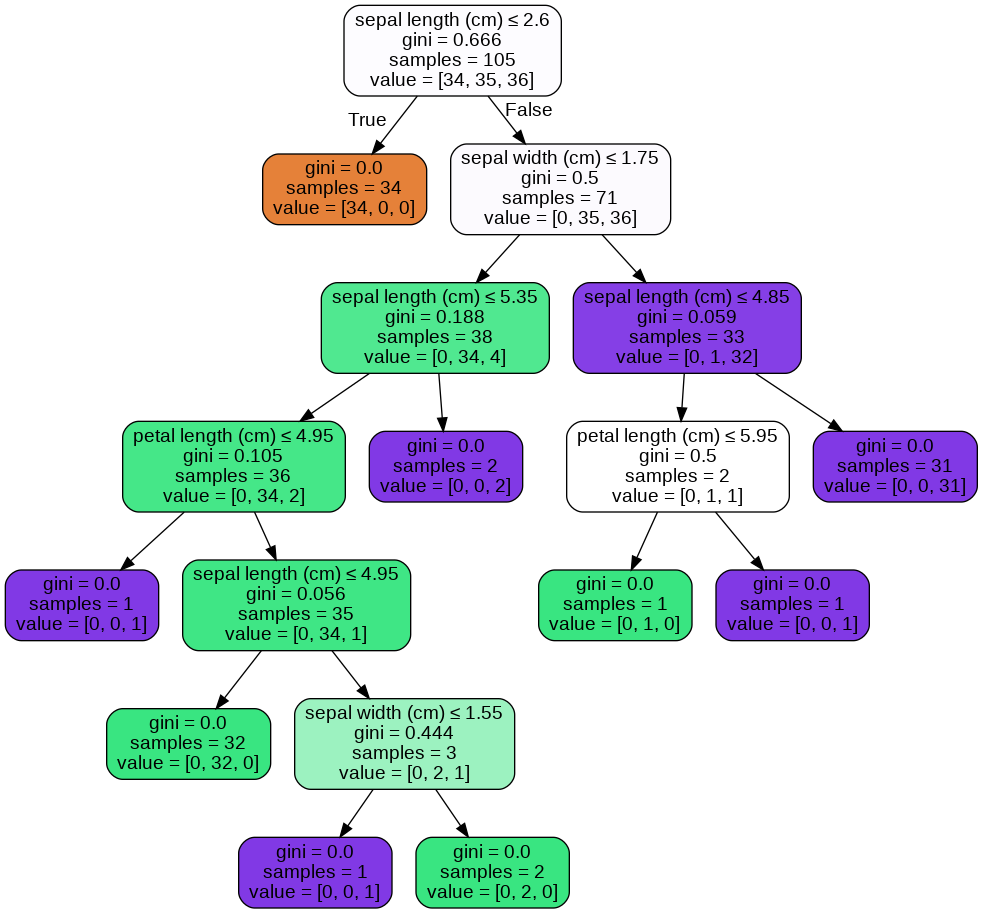

In [14]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())